In [1]:
import pandas as pd

In [2]:
news = pd.read_csv("fake_or_real_news.csv")

# Text Data Exploration

In [3]:
news.shape

(6335, 4)

In [4]:
news.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [6]:
news[news['text']== ' '] #noticed some rows of data with "text" as space

,Unnamed: 0,title,text,label
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,,FAKE
710,8332,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,FAKE
806,9314,Southern Poverty Law Center Targets Anti-Jihad...,,FAKE
919,10304,Refugee Resettlement Watch: Swept Away In Nort...,,FAKE
940,9474,Michael Bloomberg Names Technological Unemploy...,,FAKE
1664,5802,Alert News : Putins Army Is Coming For World W...,,FAKE
1736,9564,An LDS Reader Takes A Look At Trump Accuser Je...,,FAKE
1851,5752,America’s Senator Jeff Sessions Warns of Worse...,,FAKE
1883,8816,Paris Migrant Campers Increase after Calais Is...,,FAKE
1941,7525,Putins Army is coming for World war 3 against ...,,FAKE


In [7]:
news = news[news['text'] != ' '] #remove those rows of data

In [8]:
news.shape

(6299, 4)

In [9]:
news['label'].value_counts()

REAL    3171
FAKE    3128
Name: label, dtype: int64

In [10]:
#Jovian's list of stopwords
stopwords = ['a', 'able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'back', 'backward', 'backwards', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', 'came', 'can', 'cannot', 'cant', "can't", 'caption', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', "c'mon", 'co', 'co.', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', "c's", 'currently', 'd', 'dare', "daren't", 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'directly', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'evermore', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'fairly', 'far', 'farther', 'few', 'fewer', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'forever', 'former', 'formerly', 'forth', 'forward', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'half', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", 'hello', 'help', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', "here's", 'hereupon', 'hers', 'herself', "he's", 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'hundred', 'i', "i'd", 'ie', 'if', 'ignored', "i'll", "i'm", 'immediate', 'in', 'inasmuch', 'inc', 'inc.', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'inside', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", 'its', "it's", 'itself', "i've", 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'known', 'knows', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'likewise', 'little', 'look', 'looking', 'looks', 'low', 'lower', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', "mayn't", 'me', 'mean', 'meantime', 'meanwhile', 'merely', 'might', "mightn't", 'mine', 'minus', 'miss', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'must', "mustn't", 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', "needn't", 'needs', 'neither', 'never', 'neverf', 'neverless', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'no-one', 'nor', 'normally', 'not', 'nothing', 'notwithstanding', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', "one's", 'only', 'onto', 'opposite', 'or', 'other', 'others', 'otherwise', 'ought', "oughtn't", 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provided', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'recent', 'recently', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'round', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'someday', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that's", "that've", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', "there'd", 'therefore', 'therein', "there'll", "there're", 'theres', "there's", 'thereupon', "there've", 'these', 'they', "they'd", "they'll", "they're", "they've", 'thing', 'things', 'think', 'third', 'thirty', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'till', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', "t's", 'twice', 'two', 'u', 'un', 'under', 'underneath', 'undoing', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'upwards', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'v', 'value', 'various', 'versus', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", 'welcome', 'well', "we'll", 'went', 'were', "we're", "weren't", "we've", 'what', 'whatever', "what'll", "what's", "what've", 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', "where's", 'whereupon', 'wherever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whither', 'who', "who'd", 'whoever', 'whole', "who'll", 'whom', 'whomever', "who's", 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', 'wonder', "won't", 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']

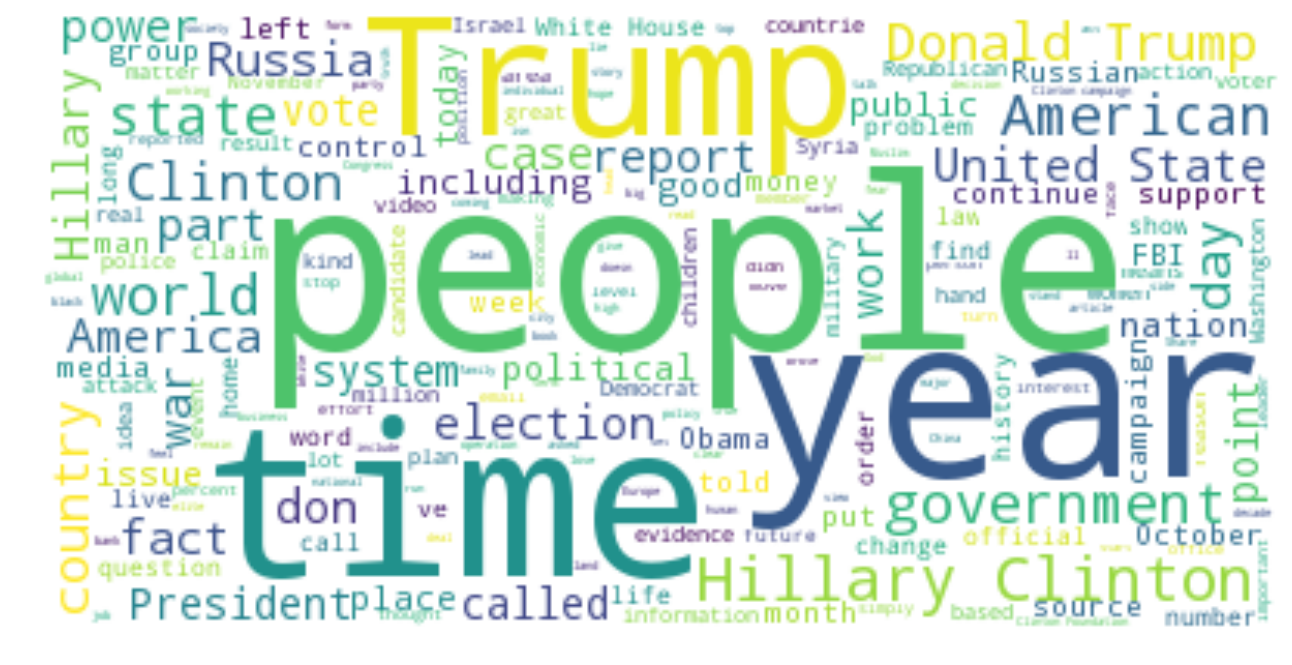

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(background_color="white", max_words=200, stopwords=stopwords)

fake_cloud = cloud.generate(news.loc[news.label == 'FAKE', 'text'].str.cat(sep='\n'))
plt.figure( figsize=(16, 8) )
plt.imshow(fake_cloud)
plt.axis("off")
plt.show()

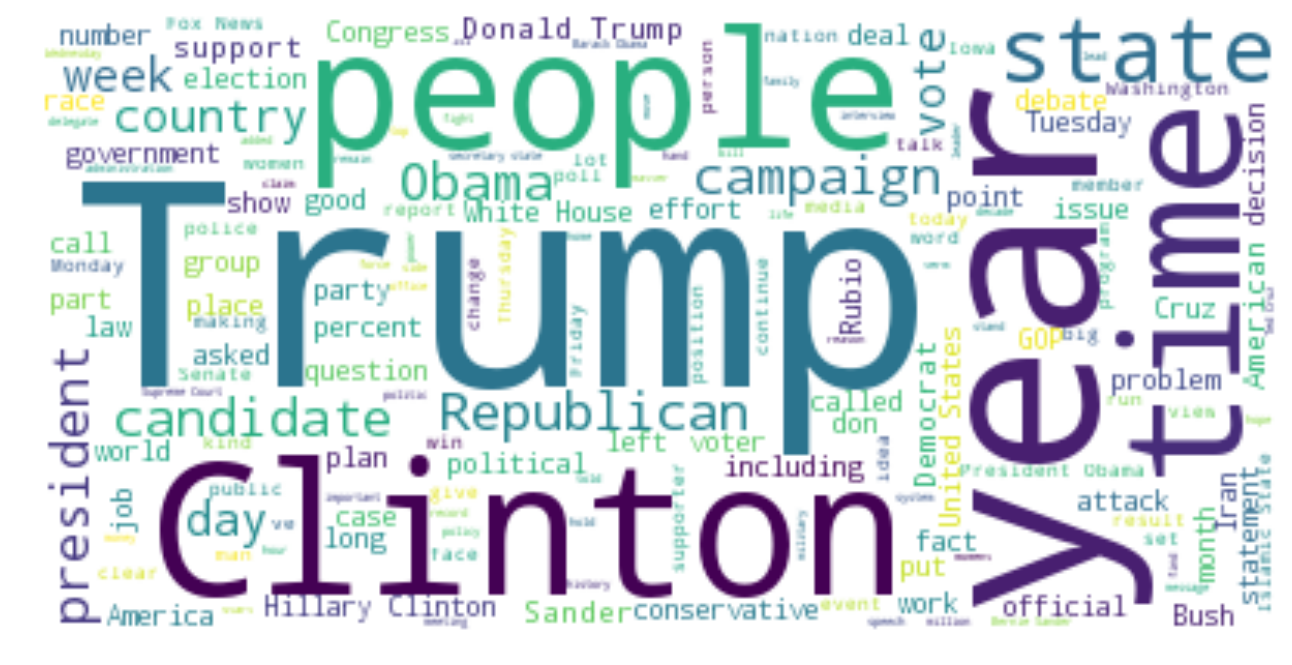

In [12]:
real_cloud = cloud.generate(news.loc[news.label == 'REAL', 'text'].str.cat(sep='\n'))
plt.figure(figsize=(16, 8) )
plt.imshow(real_cloud)
plt.axis("off")
plt.show()

In [13]:
clouddata = pd.DataFrame()
clouddata = clouddata.append(news)
clouddata['content'] = clouddata['title'] + ' ' + clouddata['text']

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_fake = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2), token_pattern=r'\b[A-Za-z]{3,}\b', stop_words=stopwords)
X_fake = vect_fake.fit_transform(clouddata.loc[clouddata.label == 'FAKE', 'content'])
X_df_fake = pd.DataFrame(X_fake.toarray(), columns=vect_fake.get_feature_names())
print(X_df_fake.shape)

(3128, 140733)


In [15]:
words_fake = X_df_fake.sum(axis=0)

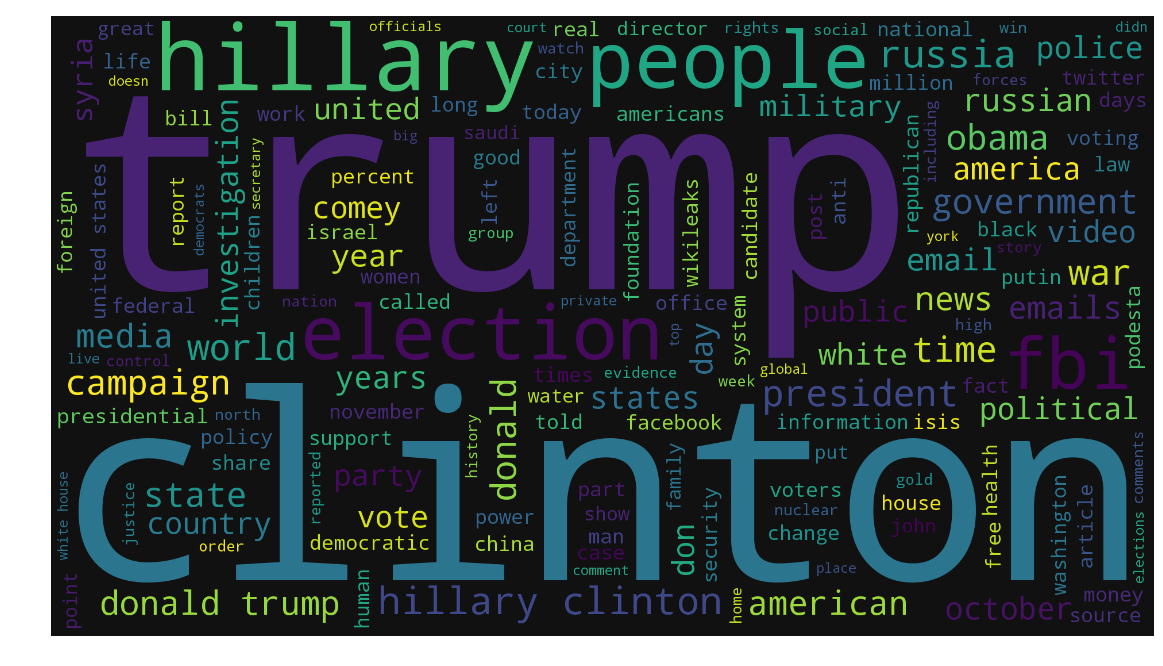

In [16]:
wordcloud = WordCloud(width=1920, height=1080, scale=1,
                      min_font_size=18, margin=20, 
                      random_state=1, 
                      background_color='#111')

fake_cloud = wordcloud.generate_from_frequencies(words_fake)

plt.figure( figsize=(16, 8) )
plt.title('')
plt.imshow(fake_cloud)
plt.axis("off")
plt.show()

In [17]:
vect_real = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2), token_pattern=r'\b[A-Za-z]{3,}\b', stop_words=stopwords)
X_real = vect_real.fit_transform(clouddata.loc[clouddata.label == 'REAL', 'content'])
X_df_real = pd.DataFrame(X_real.toarray(), columns=vect_real.get_feature_names())
print(X_df_real.shape)

(3171, 156096)


In [18]:
words_real = X_df_real.sum(axis=0)

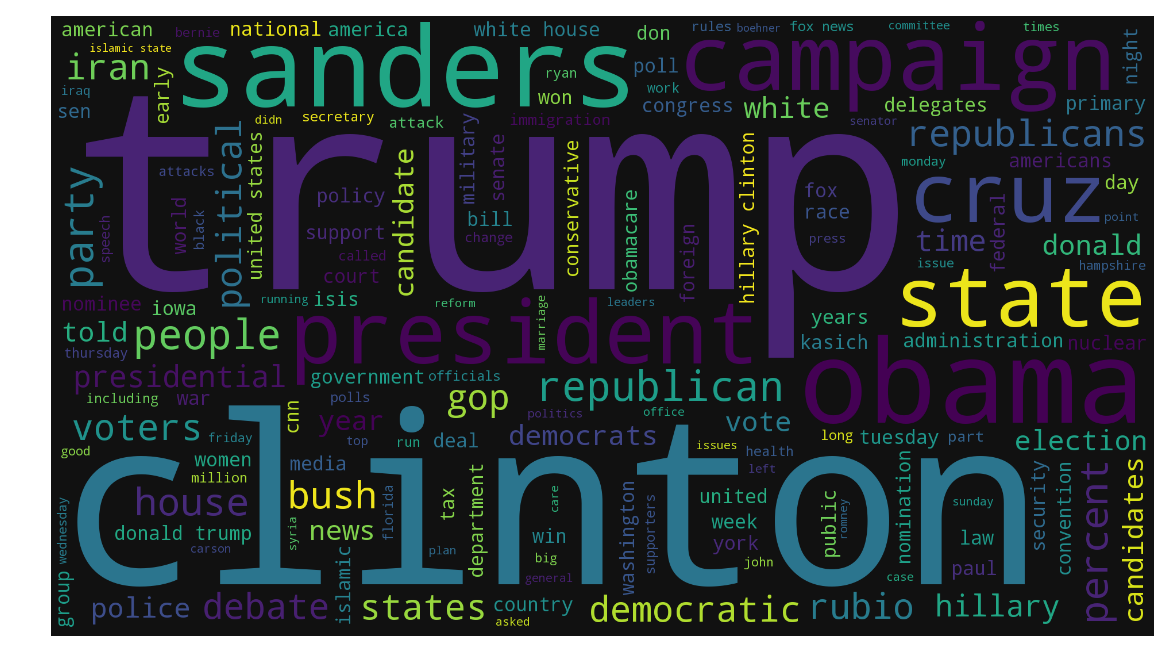

In [19]:
wordcloud = WordCloud(width=1920, height=1080, scale=1,
                      min_font_size=18, margin=20, 
                      random_state=1, 
                      background_color='#111')

real_cloud = wordcloud.generate_from_frequencies(words_real)

plt.figure( figsize=(16, 8) )
plt.title('')
plt.imshow(real_cloud)
plt.axis("off")
plt.show()

In [20]:
from PIL import Image
import numpy as np

In [21]:
DT_mask = np.array(Image.open("DonaldTrump.jpg"))

In [22]:
#BO_mask = np.array(Image.open("barack_obama.jpg"))
BO_mask = np.array(Image.open("BarackObama2.jpg"))

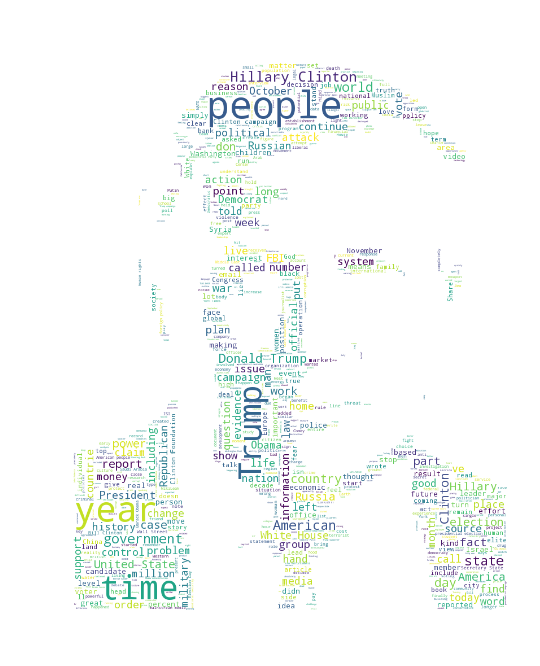

In [23]:
cloud = WordCloud( background_color="white", max_words=3000, stopwords=stopwords, mask = DT_mask)
#,background_color='#111'
fake_cloud = cloud.generate(news.loc[news.label == 'FAKE', 'text'].str.cat(sep='\n'))
plt.figure(figsize=(16, 8))
plt.imshow(fake_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()


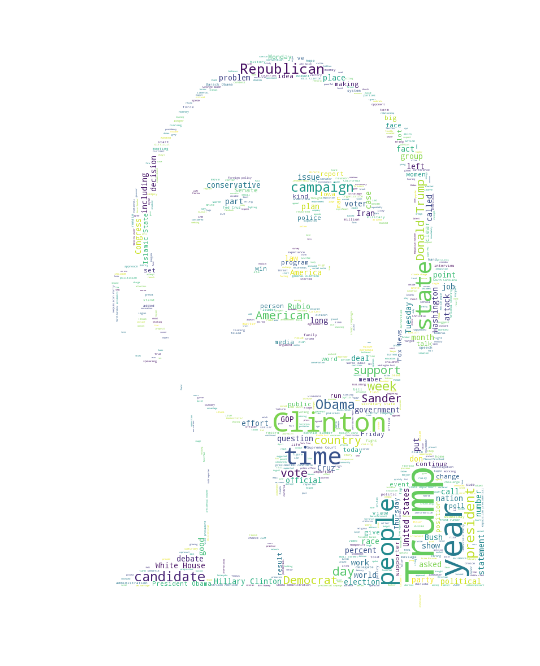

In [24]:
cloud = WordCloud(background_color="white", max_words=3000,stopwords=stopwords, mask = BO_mask)

real_cloud = cloud.generate(news.loc[news.label == 'REAL', 'text'].str.cat(sep='\n'))
plt.figure(figsize=(16, 8))
plt.imshow(real_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Processing

In [25]:
# convert label to a numerical variable
news['label_num'] = news.label.map({'REAL':0, 'FAKE':1})

In [26]:
news.head(3)

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0


In [27]:
X = news.text
y = news.label_num
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=888)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4724,)
(4724,)
(1575,)
(1575,)


In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
sel_punc = string.punctuation + '’' + '“' + '”' + '—' + '‘'
sel_punc2 = sel_punc.replace('!','')
sel_punc2 = sel_punc2.replace('?','')
len(sel_punc2) #removal of ! and ? 

35

In [31]:
import unicodedata
import re

In [32]:
final_cap = [] #to store the list which contains a list of words which are wholly uppercase
total_exclam = []
total_question = []

In [33]:
def process(X):
    X_processed = [] #to store the list which contains a list of tokens for each article
    global final_cap, total_exclam, total_question
    final_cap = []
    total_exclam = []
    total_question = []
    
    # loop through news article list
    for i in range(len(X)):
        proc = []
        stopped_proc = []

        # remove newline from news article
        new_str = X.iloc[i].replace('\n',' ')
        
        # separate hyphenated words
        # or comment this out if you want to keep hyphenated words as 1 word
        new_str = new_str.replace('-',' ')
        
        # replace funny apostrophes with normal apostrophes
        new_str = new_str.replace('’','\'')
        
        # deals with unicode
        new_str = unicodedata.normalize("NFKD", new_str)
        
        # split news article into tokens, strip selected punctuations from beginning and end of words
        # (doesn't remove punctuation in the middle of words yet - some stopwords contain punctuation in the middle)
        proc = [word.strip(sel_punc2) for word in new_str.split(" ")]
        
        # filter out stopwords and empty strings 
        filtered = [f for f in proc if f and f.lower() not in stopwords]
        
        # remove selected punctuations in the middle. ! & ?? are retained
        filtered = [re.split('(!|\?{2,})|["#$?%&\'()*+,./:;<=>@[\\]^_`{|}~’“”—‘]', token) for token in filtered]
        
        # flatten list
        filtered = sum(filtered, [])
        
        # filter out stopwords and empty strings again (and stem if needed)
        filtered = [f for f in filtered if f and f.lower() not in stopwords]
        #filtered = [stemmer.stem(f) for f in filtered if f and f.lower() not in stopwords]
        #filtered = [lemma.lemmatize(f) for f in filtered if f and f.lower() not in stopwords]
    
        # create a separate list to contain the number of ? and ! found in each news article
        exclamation_count = filtered.count("!")
        question_count = sum([1 for f in filtered if re.match("\?{2,}", f)])
    
        cap_list = [] #new list to store only cap words found in the current article
    
        for i in range(len(filtered)):
    
            capwords = re.match(r'(^[A-Z]+[A-Z]$)',filtered[i]) #look for capital letter
    
            if capwords:
                cap_list.append(capwords.group())
            else:
                filtered[i] = filtered[i].lower() #except for words that are wholly uppercase, the rest of the words are converted to lower case
    
        # add tokens to list
        X_processed.append(filtered)
    
        #add capital words to list
        final_cap.append(cap_list)
        total_exclam.append(exclamation_count)
        total_question.append(question_count)
    return X_processed

In [34]:
%time X_train_processed = process(X_train)

CPU times: user 58.3 s, sys: 450 ms, total: 58.8 s
Wall time: 1min


In [35]:
exclam_X_train = total_exclam
question_X_train = total_question
cap_X_train = final_cap

In [36]:
%time X_test_processed = process(X_test)

CPU times: user 18.9 s, sys: 130 ms, total: 19 s
Wall time: 19.4 s


In [37]:
cap_X_test = final_cap
exclam_X_test = total_exclam
question_X_test = total_question

# Null model

In [38]:
# calculate the null accuracy
y_test.value_counts().head(1) / y_test.shape

0    0.507302
Name: label_num, dtype: float64

# Modeling - First Round

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics

In [40]:
def tokenize(vect):    

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train_processed)
    X_test_dtm = vect.transform(X_test_processed)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes 
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Naive Bayes Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (poorly calibrated)
    y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
    y_pred_prob
    
    # calculate AUC
    print('Naive Bayes AUC score: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    # use LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train_dtm, y_train)
    y_pred_class = logreg.predict(X_test_dtm)
    
    # calculate accuracy
    print('Logistic Regression Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (well calibrated)
    y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
    y_pred_prob
    
    # calculate AUC
    print('Logistic Regression AUC score: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    #use Tree
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train_dtm, y_train)
    y_pred_class = clf.predict(X_test_dtm)
    
    # calculate accuracy
    print('Tree Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (well calibrated)
    y_pred_prob = clf.predict_proba(X_test_dtm)[:, 1]
    y_pred_prob
    
    # calculate AUC
    print('Tree AUC score: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    #use RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train_dtm, y_train)
    y_pred_class = rf.predict(X_test_dtm)
    
    # calculate accuracy
    print('Random Forest Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (well calibrated)
    y_pred_prob = rf.predict_proba(X_test_dtm)[:, 1]
    y_pred_prob
    
    # calculate AUC
    print('Random Forest AUC score: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    #use GrandientBoosting
    gb = GradientBoostingClassifier(verbose=True)
    gb.fit(X_train_dtm, y_train)
    y_pred_class = gb.predict(X_test_dtm.toarray())
    
    # calculate accuracy
    print('GrandientBoosting Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (well calibrated)
    y_pred_prob = gb.predict_proba(X_test_dtm.toarray())[:,1]
    y_pred_prob
    
    # calculate AUC
    print('GrandientBoosting AUC score: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    #use SVM
    svm = SVC(probability  = True)
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)
    
    # calculate accuracy
    print('SVC Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (well calibrated)
    y_pred_prob = svm.predict_proba(X_test_dtm)[:,1]
    y_pred_prob
    
    # calculate AUC
    print('SVC AUC score: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    #use Neural Network
    nn = MLPClassifier()
    nn.fit(X_train_dtm, y_train)
    y_pred_class = nn.predict(X_test_dtm)
    
    # calculate accuracy
    print('Neural Network Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # calculate predicted probabilities for X_test_dtm (well calibrated)
    y_pred_prob = nn.predict_proba(X_test_dtm)[:,1]
    y_pred_prob
    
    # calculate AUC
    print('Neural Network score: ', metrics.roc_auc_score(y_test, y_pred_prob))

In [41]:
# instantiate the vectorizer
vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
tokenize(vect)

Features:  62847
Naive Bayes Accuracy:  0.88253968254
Naive Bayes AUC score:  0.93477510548
Logistic Regression Accuracy:  0.909206349206
Logistic Regression AUC score:  0.962666767738
Tree Accuracy:  0.814603174603
Tree AUC score:  0.814489439118
Random Forest Accuracy:  0.83873015873
Random Forest AUC score:  0.923827948596
      Iter       Train Loss   Remaining Time 
         1           1.3237           19.57s
         2           1.2709           19.05s
         3           1.2271           19.13s
         4           1.1866           18.48s
         5           1.1516           18.13s
         6           1.1199           17.98s
         7           1.0936           17.52s
         8           1.0685           16.99s
         9           1.0441           16.70s
        10           1.0213           16.49s
        20           0.8743           14.19s
        30           0.7743           12.14s
        40           0.7037           10.46s
        50           0.6491            8.

In [42]:
# include 1-grams and 2-grams, and only keep terms that appear in at least 2 documents
vect = CountVectorizer(ngram_range=(1, 2), min_df=2, tokenizer=lambda doc: doc, lowercase=False)
tokenize(vect)

Features:  217264
Naive Bayes Accuracy:  0.907301587302
Naive Bayes AUC score:  0.950987381134
Logistic Regression Accuracy:  0.921904761905
Logistic Regression AUC score:  0.969843102848
Tree Accuracy:  0.812698412698
Tree AUC score:  0.812686283112
Random Forest Accuracy:  0.845079365079
Random Forest AUC score:  0.924407764861
      Iter       Train Loss   Remaining Time 
         1           1.3237           57.18s
         2           1.2709           51.64s
         3           1.2271           49.18s
         4           1.1862           48.09s
         5           1.1512           47.25s
         6           1.1196           46.33s
         7           1.0937           45.50s
         8           1.0685           44.28s
         9           1.0443           43.37s
        10           1.0212           42.46s
        20           0.8701           36.09s
        30           0.7720           30.98s
        40           0.7032           27.10s
        50           0.6474          

In [186]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2), tokenizer=lambda doc: doc, lowercase=False)
tokenize(vect)

Features:  1218954
Naive Bayes Accuracy:  0.901587301587
Naive Bayes AUC score:  0.959148355548
Logistic Regression Accuracy:  0.92380952381
Logistic Regression AUC score:  0.970094706011
Tree Accuracy:  0.814603174603
Tree AUC score:  0.814545082126
Random Forest Accuracy:  0.84253968254
Random Forest AUC score:  0.91688386256
      Iter       Train Loss   Remaining Time 
         1           1.3237            4.65m
         2           1.2709            4.45m
         3           1.2271            4.35m
         4           1.1862            4.26m
         5           1.1512            4.21m
         6           1.1196            4.14m
         7           1.0937            4.09m
         8           1.0685            4.03m
         9           1.0443            3.98m
        10           1.0212            3.93m
        20           0.8701            3.44m
        30           0.7720            3.00m
        40           0.7032            2.55m
        50           0.6474            

In [187]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5, tokenizer=lambda doc: doc, lowercase=False) 
tokenize(vect)

Features:  62845
Naive Bayes Accuracy:  0.88253968254
Naive Bayes AUC score:  0.934792846729
Logistic Regression Accuracy:  0.910476190476
Logistic Regression AUC score:  0.962863534315
Tree Accuracy:  0.816507936508
Tree AUC score:  0.816274047456
Random Forest Accuracy:  0.834920634921
Random Forest AUC score:  0.912317910274
      Iter       Train Loss   Remaining Time 
         1           1.3237           20.38s
         2           1.2709           18.61s
         3           1.2271           17.95s
         4           1.1866           17.37s
         5           1.1516           17.12s
         6           1.1199           16.68s
         7           1.0936           16.63s
         8           1.0685           16.27s
         9           1.0441           16.06s
        10           1.0213           15.80s
        20           0.8743           13.53s
        30           0.7744           11.74s
        40           0.7018           10.01s
        50           0.6486            

In [45]:
# only keep the top 1000 most frequent terms
vect = CountVectorizer(max_features=1000, tokenizer=lambda doc: doc, lowercase=False)
tokenize(vect)

Features:  1000
Naive Bayes Accuracy:  0.822857142857
Naive Bayes AUC score:  0.874173419093
Logistic Regression Accuracy:  0.88
Logistic Regression AUC score:  0.939541856444
Tree Accuracy:  0.803174603175
Tree AUC score:  0.802799569049
Random Forest Accuracy:  0.859047619048
Random Forest AUC score:  0.933402577965
      Iter       Train Loss   Remaining Time 
         1           1.3237            5.19s
         2           1.2709            4.88s
         3           1.2264            4.78s
         4           1.1861            4.78s
         5           1.1512            4.67s
         6           1.1209            4.59s
         7           1.0939            4.48s
         8           1.0692            4.42s
         9           1.0454            4.39s
        10           1.0228            4.32s
        20           0.8702            3.78s
        30           0.7783            3.25s
        40           0.7041            2.77s
        50           0.6494            2.31s
    

In [46]:
# Needs to set seed here
np.random.seed(888)
vect = TfidfVectorizer(norm=None, tokenizer=lambda doc: doc, lowercase=False)
tokenize(vect)

Features:  62847
Naive Bayes Accuracy:  0.894603174603
Naive Bayes AUC score:  0.938445931125
Logistic Regression Accuracy:  0.907936507937
Logistic Regression AUC score:  0.963425609331
Tree Accuracy:  0.812063492063
Tree AUC score:  0.8119306672
Random Forest Accuracy:  0.833015873016
Random Forest AUC score:  0.916933860625
      Iter       Train Loss   Remaining Time 
         1           1.3237           19.36s
         2           1.2709           18.47s
         3           1.2271           18.35s
         4           1.1866           17.67s
         5           1.1516           17.45s
         6           1.1199           17.35s
         7           1.0936           17.73s
         8           1.0685           17.62s
         9           1.0441           17.50s
        10           1.0213           17.21s
        20           0.8743           14.86s
        30           0.7743           13.27s
        40           0.7037           11.05s
        50           0.6491            9

# Feature Engineering

### Ratio on fake words

In [47]:
# create document-term matrices using the vectorizer
X_train_dtm = vect.fit_transform(X_train_processed)
X_test_dtm = vect.transform(X_test_processed)
    
# use Multinomial Naive Bayes 
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
# number of times each token appears across all real messages
real_token_count = nb.feature_count_[0, :]
# number of times each token appears across all fake messages
fake_token_count = nb.feature_count_[1, :]
# create a DataFrame of tokens with their separate real and fake counts
tokens = pd.DataFrame({'token':X_train_tokens, 'real':real_token_count, 'fake':fake_token_count}).set_index('token')
# convert the real and fake counts into frequencies
tokens['real'] = tokens.real / nb.class_count_[0]
tokens['fake'] = tokens.fake / nb.class_count_[1]
# add 1 to real and fake counts to avoid dividing by 0
tokens['real'] = tokens.real + 1
tokens['fake'] = tokens.fake + 1
# calculate the ratio of fake-to-real for each token
tokens['fake_ratio'] = tokens.fake / tokens.real
# examine the DataFrame sorted by fake_ratio
tokens.sort_values('fake_ratio', ascending=False).head(10)

,fake,real,fake_ratio
token,,,
russia,3.382520,1.583401,2.136237
comey,2.287064,1.137824,2.010034
FBI,3.041842,1.519780,2.001502
october,2.340397,1.307258,1.790310
wikileaks,1.903948,1.070980,1.777763
!,2.957880,1.670479,1.770677
podesta,1.912337,1.108927,1.724494
article,1.916166,1.164664,1.645253
0,1.899421,1.154585,1.645111


### Number of words in the news article

In [49]:
from textblob import TextBlob

In [50]:
news['length'] = news.text.apply(len)

### Sentiment polarity and subjectivity on the news articles

In [51]:
# define a function that accepts text and returns the polarity
def detect_sentiment_polarity(text):
    blob = TextBlob(text)
    # return the polarity
    return blob.sentiment.polarity

In [52]:
# define a function that accepts text and returns the subjectivity
def detect_sentiment_subjectivity(text):
    blob = TextBlob(text)
    # return the polarity
    return blob.sentiment.subjectivity

In [53]:
news['sentiment_polarity'] = news.text.apply(detect_sentiment_polarity)

In [54]:
news['sentiment_subjectivity'] = news.text.apply(detect_sentiment_subjectivity)

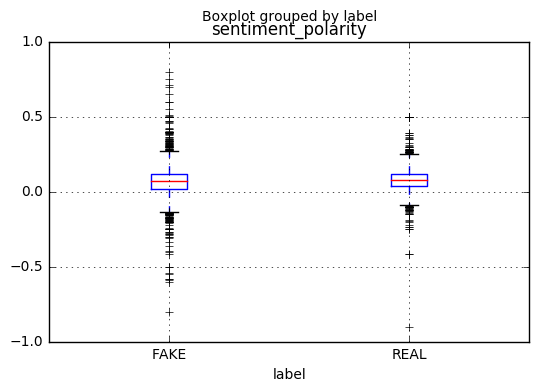

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
news.boxplot('sentiment_polarity', by='label')

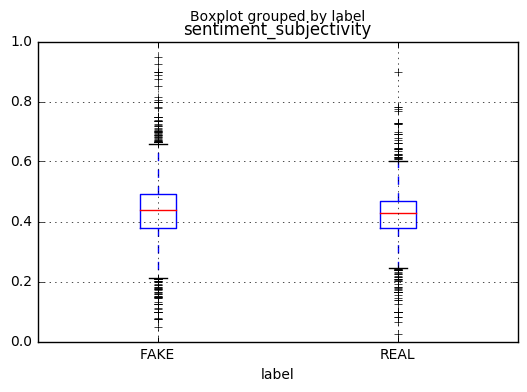

In [56]:
%matplotlib inline
news.boxplot('sentiment_subjectivity', by='label')

### Sentiment polarity and subjectivity on the title of the news articles

In [57]:
### Detect sentiment polarity and subjectivity of titles
news['title_sentiment_polarity'] = news.title.apply(detect_sentiment_polarity)

In [58]:
news['title_sentiment_subjectivity'] = news.title.apply(detect_sentiment_subjectivity)

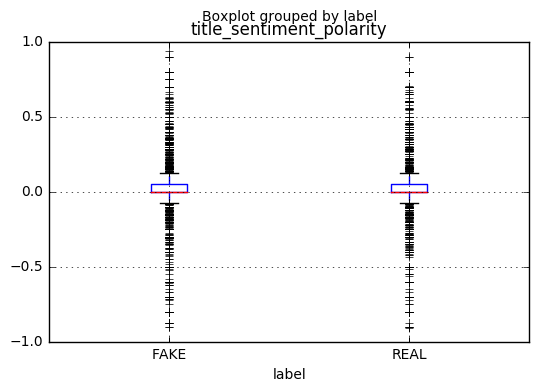

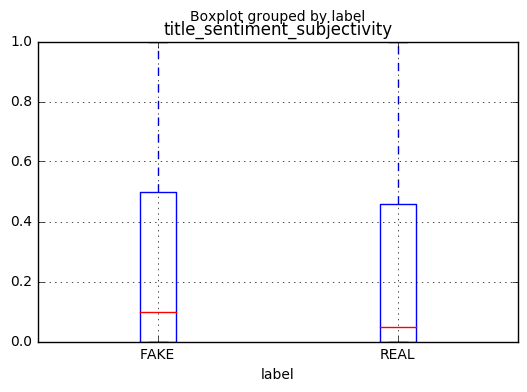

In [59]:
%matplotlib inline
news.boxplot('title_sentiment_polarity', by='label') #why do i always have problems plotting boxplots? hmm
news.boxplot('title_sentiment_subjectivity', by='label')

### Readability index on the news articles

In [60]:
from textstat.textstat import textstat

# tabulate the gunning fog index to determine the readability of the news text
news['fog_index'] = [textstat.gunning_fog(text) for text in news.text] 

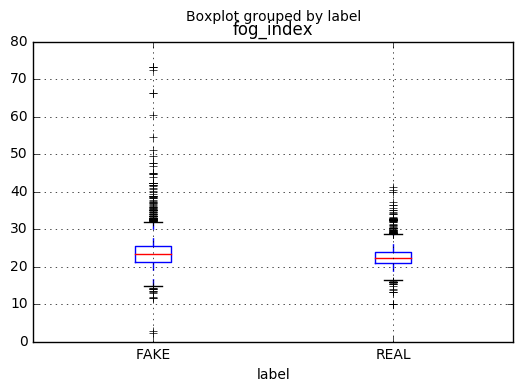

In [61]:
%matplotlib inline
news.boxplot('fog_index', by='label')

### AFINN scores on the title and the news articles

In [62]:
from afinn import Afinn

#Afinn sentiment scores on the news text
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(text) for text in news.text] 
news['afinn'] = afinn_scores

In [63]:
#Afinn sentiment scores on the news title
news['title_afinn'] = [afinn.score(title) for title in news.title]

### Latent Dirichlet Allocation

In [64]:
news.shape

(6299, 13)

In [65]:
from gensim import corpora, models
import gensim

In [66]:
from collections import defaultdict
frequency = defaultdict(int)

for text in X_train_processed:
    for token in text:
        frequency[token] += 1

#keeping only word tokens that has more than 1 count
X_train_processed_LDA = [[token for token in text if frequency[token] > 1] for text in X_train_processed]


for text in X_test_processed:
    for token in text:
        frequency[token] += 1

X_test_processed_LDA = [[token for token in text if frequency[token] > 1] for text in X_test_processed]

In [67]:
dictionary = corpora.Dictionary(X_train_processed_LDA)
print(dictionary) # a dictionary of the unique tokens
corpus = [dictionary.doc2bow(text) for text in X_train_processed_LDA] #creating a vector of word id and count

Dictionary(39785 unique tokens: ['gripped', 'learn', 'examinations', 'monetary', 'pushers']...)


In [68]:
#First run of the lda model where we state that there are two topics in the articles namely the fake and real news
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=2,id2word = dictionary, passes=20)

In [69]:
#To get the probability distribution of the topics for each document

def get_doc_topics(lda, bow):
    gamma, _ = lda.inference([bow])
    topic_dist = gamma[0] / sum(gamma[0])
    return [(topicid, topicvalue) for topicid, topicvalue in enumerate(topic_dist)]

#### Train data set with K = 2

In [70]:
#create a dataframe of probability distribution and y_train based on K = 2

prob_distribution = []
topic0 = []
topic1= []
for i in range(len(corpus)):
    prob = []
    prob = get_doc_topics(ldamodel, corpus[i])
    topic0.append(prob[0][1]) # to get only the probability figures for each topic
    topic1.append(prob[1][1])

In [71]:
lda_prob_dfK2 = pd.DataFrame({"Topic 0":topic0, "Topic 1":topic1, "label_num":y_train})
lda_prob_dfK2.head(5)

,Topic 0,Topic 1,label_num
5187,0.134093,0.865907,0
4056,0.996682,0.003318,0
4582,0.623069,0.376931,1
5763,0.058922,0.941078,1
2175,0.755527,0.244473,1


In [72]:
#get the predicted probability based on the probability distribution of the topic for each document
lda_prob_dfK2['pred_prob'] = np.where((lda_prob_dfK2['Topic 0'] >= lda_prob_dfK2['Topic 1']), 0, 1)
lda_prob_dfK2.head(5)

,Topic 0,Topic 1,label_num,pred_prob
5187,0.134093,0.865907,0,1
4056,0.996682,0.003318,0,0
4582,0.623069,0.376931,1,0
5763,0.058922,0.941078,1,1
2175,0.755527,0.244473,1,0


In [73]:
metrics.confusion_matrix(lda_prob_dfK2['label_num'], lda_prob_dfK2['pred_prob']) 

array([[1699,  673],
       [ 884, 1468]])

In [74]:
metrics.accuracy_score(lda_prob_dfK2['label_num'], lda_prob_dfK2['pred_prob']) # accuracy on the train dataset

0.67040643522438614

#### Test data set with K = 2

In [75]:
dictionary_test = corpora.Dictionary(X_test_processed_LDA)
#print(dictionary) # a dictionary of the unique tokens
corpus_test = [dictionary_test.doc2bow(text) for text in X_test_processed_LDA] #creating a vector of word id and count for test dataset

In [76]:
prob_distribution = []
topic0 = []
topic1= []
for i in range(len(corpus_test)):
    prob = []
    prob = get_doc_topics(ldamodel, corpus_test[i])
    topic0.append(prob[0][1]) # to get only the probability figures for each topic
    topic1.append(prob[1][1])

In [77]:
lda_prob_dfK2_test = pd.DataFrame({"Topic 0":topic0, "Topic 1":topic1, "label_num":y_test})

#get the predicted probability based on the probability distribution of the topic for each document
lda_prob_dfK2_test['pred_prob'] = np.where((lda_prob_dfK2_test['Topic 0'] >= lda_prob_dfK2_test['Topic 1']), 0, 1)
lda_prob_dfK2_test.head(5)

,Topic 0,Topic 1,label_num,pred_prob
4144,0.101825,0.898175,0,1
1444,0.098864,0.901136,1,1
2300,0.678651,0.321349,0,0
4999,0.685057,0.314943,0,0
5289,0.842467,0.157533,0,0


In [78]:
metrics.confusion_matrix(lda_prob_dfK2_test['label_num'], lda_prob_dfK2_test['pred_prob'])

array([[118, 681],
       [109, 667]])

In [79]:
metrics.accuracy_score(lda_prob_dfK2_test['label_num'], lda_prob_dfK2_test['pred_prob']) # accuracy on the test dataset

0.49841269841269842

In [80]:
ldamodel.print_topics(2)

[(0,
  '0.018*"trump" + 0.014*"clinton" + 0.006*"campaign" + 0.006*"hillary" + 0.006*"president" + 0.005*"party" + 0.005*"republican" + 0.005*"obama" + 0.004*"state" + 0.004*"election"'),
 (1,
  '0.006*"people" + 0.004*"world" + 0.003*"state" + 0.003*"war" + 0.003*"government" + 0.003*"police" + 0.003*"–" + 0.003*"time" + 0.002*"year" + 0.002*"years"')]

In [81]:
#The above are the top 10 words associated to each topic. Topic 0 is associated with Real news articles, 
#whereas, Topic 1 is associated with Fake news articles

#### Finding Optimal K

In [82]:
import csv

In [83]:
filecoords = open('coords.csv','w') #creating a file to store the coordinates

tfidf = gensim.models.TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]
# project to 2 dimensions for visualization
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)

# write out coordinates to file
for vector in lsi[corpus]:
    if len(vector) != 2:
        continue
    filecoords.write("%6.4f\t%6.4f\n" % (vector[0][1], vector[1][1]))
filecoords.close()

In [84]:
from matplotlib import colors as mcolors
from sklearn.cluster import KMeans

In [85]:
MAX_K = 10
X = np.loadtxt("coords.csv", delimiter="\t") #reading in the csv file into a numpy array
ks = range(1, MAX_K + 1)

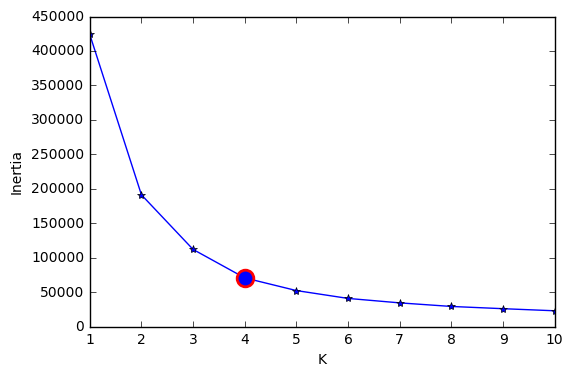

In [86]:
#using the elbow method to determine the optimal K

inertias = np.zeros(MAX_K)
diff = np.zeros(MAX_K)
diff2 = np.zeros(MAX_K)
diff3 = np.zeros(MAX_K)
for k in ks:
    kmeans = KMeans(k).fit(X)
    inertias[k - 1] = kmeans.inertia_
    # first difference    
    if k > 1:
        diff[k - 1] = inertias[k - 1] - inertias[k - 2]
    # second difference
    if k > 2:
        diff2[k - 1] = diff[k - 1] - diff[k - 2]
    # third difference
    if k > 3:
        diff3[k - 1] = diff2[k - 1] - diff2[k - 2]

elbow = np.argmin(diff3[3:]) + 3

plt.plot(ks, inertias, "b*-")
plt.plot(ks[elbow], inertias[elbow], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor=None)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.show()

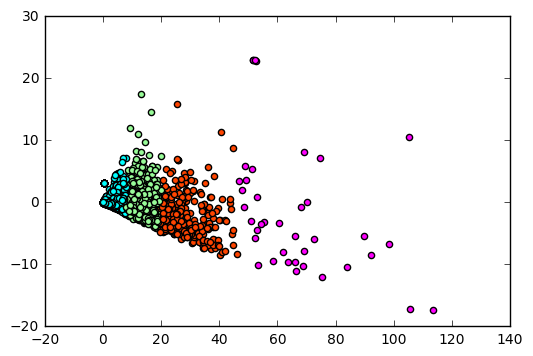

In [87]:
NUM_TOPICS = 4 #obtained from obove

kmeans = KMeans(NUM_TOPICS).fit(X)
y = kmeans.labels_

colors = ["aqua", "palegreen", "orangered", "magenta"]
for i in range(X.shape[0]):
    plt.scatter(X[i][0], X[i][1], c=colors[y[i]], s=20)    
plt.show() 

#### Train data set with K = 4

In [88]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus,num_topics=4,id2word = dictionary, passes=20)

In [89]:
#create a dataframe of probability distribution and y_train based on K = 4
topic0 = []
topic1= []
topic2 = []
topic3= []
for i in range(len(corpus)):
    prob = []
    prob = get_doc_topics(ldamodel2, corpus[i])
    topic0.append(prob[0][1]) # to get only the probability figures for each topic
    topic1.append(prob[1][1])
    topic2.append(prob[2][1])
    topic3.append(prob[3][1])

In [90]:
lda_prob_dfK4 = pd.DataFrame({0:topic0, 1:topic1,2:topic2, 3:topic3,"label_num":y_train})
lda_prob_dfK4.head(5)

,0,1,2,3,label_num
5187,0.000628,0.000639,0.642881,0.355852,0
4056,0.862197,0.041870,0.001112,0.094820,0
4582,0.396557,0.599638,0.001878,0.001928,1
5763,0.020401,0.020902,0.285861,0.672836,1
2175,0.485993,0.308676,0.122336,0.082995,1


In [91]:
lda_prob_dfK4['pred_prob'] = lda_prob_dfK4.ix[:,0:4].apply(np.argmax, axis=1) #to choose among the topic columns with the highest probability
lda_prob_dfK4.head()

,0,1,2,3,label_num,pred_prob
5187,0.000628,0.000639,0.642881,0.355852,0,2
4056,0.862197,0.041870,0.001112,0.094820,0,0
4582,0.396557,0.599638,0.001878,0.001928,1,1
5763,0.020401,0.020902,0.285861,0.672836,1,3
2175,0.485993,0.308676,0.122336,0.082995,1,0


In [92]:
metrics.confusion_matrix(lda_prob_dfK4['label_num'], lda_prob_dfK4['pred_prob']) # break down of the topics against the REAL/FAKE news

array([[1149,  260,  411,  552],
       [ 545,  889,  686,  232],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]])

#### Test data set with K = 4

In [93]:
topic0 = []
topic1= []
topic2 = []
topic3= []
for i in range(len(corpus_test)):
    prob = []
    prob = get_doc_topics(ldamodel2, corpus_test[i])
    topic0.append(prob[0][1]) # to get only the probability figures for each topic
    topic1.append(prob[1][1])
    topic2.append(prob[2][1])
    topic3.append(prob[3][1])

In [94]:
lda_prob_dfK4_test = pd.DataFrame({0:topic0, 1:topic1,2:topic2, 3:topic3,"label_num":y_test})

lda_prob_dfK4_test['pred_prob'] = lda_prob_dfK4_test.ix[:,0:4].apply(np.argmax, axis=1) #to choose the column with the highest probability
lda_prob_dfK4_test.head() #inital dataframe

,0,1,2,3,label_num,pred_prob
4144,0.002355,0.115470,0.538694,0.343481,0,2
1444,0.001042,0.001060,0.579346,0.418552,1,2
2300,0.393215,0.373123,0.119078,0.114584,0,0
4999,0.511934,0.276165,0.173716,0.038185,0,0
5289,0.503097,0.181746,0.126055,0.189102,0,0


In [95]:
metrics.confusion_matrix(lda_prob_dfK4_test['label_num'], lda_prob_dfK4_test['pred_prob'])

array([[ 72, 596, 116,  15],
       [ 74, 572, 115,  15],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

In [96]:
ldamodel2.print_topics(4)

[(0,
  '0.028*"trump" + 0.018*"clinton" + 0.009*"campaign" + 0.007*"party" + 0.007*"republican" + 0.007*"hillary" + 0.006*"president" + 0.006*"election" + 0.006*"sanders" + 0.005*"donald"'),
 (1,
  '0.007*"people" + 0.005*"world" + 0.004*"–" + 0.004*"time" + 0.003*"years" + 0.003*"year" + 0.003*"!" + 0.003*"government" + 0.002*"percent" + 0.002*"system"'),
 (2,
  '0.006*"state" + 0.006*"clinton" + 0.005*"war" + 0.005*"russia" + 0.005*"military" + 0.005*"FBI" + 0.004*"obama" + 0.004*"president" + 0.004*"people" + 0.004*"iran"'),
 (3,
  '0.007*"police" + 0.007*"obama" + 0.006*"law" + 0.006*"court" + 0.005*"house" + 0.005*"president" + 0.005*"people" + 0.005*"congress" + 0.004*"state" + 0.004*"federal"')]

In [97]:
#The above are the top 10 words associated to each topic. 

In [98]:
# To avoid introducing more noise into our dataset, the probability distribution of the topics will not be
# aggregated. All 4 topics probability distribution will be added as features into the actual dataset. 

#### Produce the LDA topic probability features on the whole dataset

In [99]:
X = news.text #re-assign because X was used to load another data earlier
AllText = process(X) #to process the text of all the news article and generate their topic probability to include as features

In [100]:
dictionary_all = corpora.Dictionary(AllText)
#print(dictionary) # a dictionary of the unique tokens
corpus_all = [dictionary_all.doc2bow(text) for text in AllText] #creating a vector of word id and count for test dataset

In [101]:
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus_all,num_topics=4,id2word = dictionary_all, passes=20)

In [102]:
#create a dataframe of probability distribution on the entire news dataset based on K = 4
topic0 = []
topic1= []
topic2 = []
topic3= []
for i in range(len(corpus_all)):
    prob = []
    prob = get_doc_topics(ldamodel3, corpus_all[i])
    topic0.append(prob[0][1]) # to get only the probability figures for each topic
    topic1.append(prob[1][1])
    topic2.append(prob[2][1])
    topic3.append(prob[3][1])

In [103]:
lda_prob_df_all = pd.DataFrame({"T0":topic0, "T1":topic1, "T2":topic2, "T3":topic3}, index = news.index)

In [104]:
lda_prob_df_all.head(5)

,T0,T1,T2,T3
0,0.769491,0.173689,0.037857,0.018963
1,0.526316,0.471052,0.001336,0.001296
2,0.001297,0.001269,0.131362,0.866072
3,0.238473,0.759355,0.001085,0.001086
4,0.001660,0.995079,0.001630,0.001631


In [105]:
news = news.join(lda_prob_df_all)

In [106]:
news.head(5)

,Unnamed: 0,title,text,label,label_num,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,fog_index,afinn,title_afinn,T0,T1,T2,T3
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,7518,0.059595,0.562654,0.000000,0.000000,18.855062,-136.0,-2.0,0.769491,0.173689,0.037857,0.018963
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,2646,0.082652,0.518638,0.125000,0.175000,22.713874,0.0,-1.0,0.526316,0.471052,0.001336,0.001296
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,2543,0.102574,0.348775,0.000000,0.000000,24.004269,-6.0,2.0,0.001297,0.001269,0.131362,0.866072
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,2660,0.063645,0.503563,-0.875000,0.200000,26.767525,7.0,-4.0,0.238473,0.759355,0.001085,0.001086
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,1840,0.251709,0.420109,0.268182,0.477273,17.882271,31.0,0.0,0.001660,0.995079,0.001630,0.001631


### Number of Capital words, question marks and exclamation marks in the news articles

In [107]:
news['cap_words'] = final_cap
news['num_cap_words'] = news.cap_words.apply(len)
news.head(5)

,Unnamed: 0,title,text,label,label_num,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,fog_index,afinn,title_afinn,T0,T1,T2,T3,cap_words,num_cap_words
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,7518,0.059595,0.562654,0.000000,0.000000,18.855062,-136.0,-2.0,0.769491,0.173689,0.037857,0.018963,"[FBI, FBI, CNN, FBI, FBI, CNN, FBI, FBI, FBI, ...",39
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,2646,0.082652,0.518638,0.125000,0.175000,22.713874,0.0,-1.0,0.526316,0.471052,0.001336,0.001296,"[ABC, DNC]",2
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,2543,0.102574,0.348775,0.000000,0.000000,24.004269,-6.0,2.0,0.001297,0.001269,0.131362,0.866072,[],0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,2660,0.063645,0.503563,-0.875000,0.200000,26.767525,7.0,-4.0,0.238473,0.759355,0.001085,0.001086,"[GOP, DNC, DNC, DNC, GOP, PM]",6
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,1840,0.251709,0.420109,0.268182,0.477273,17.882271,31.0,0.0,0.001660,0.995079,0.001630,0.001631,[GOP],1


In [108]:
del news['cap_words']
news['num_exclamation'] = total_exclam
news['num_question'] = total_question
news.head(5)

,Unnamed: 0,title,text,label,label_num,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,fog_index,afinn,title_afinn,T0,T1,T2,T3,num_cap_words,num_exclamation,num_question
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,7518,0.059595,0.562654,0.000000,0.000000,18.855062,-136.0,-2.0,0.769491,0.173689,0.037857,0.018963,39,0,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,2646,0.082652,0.518638,0.125000,0.175000,22.713874,0.0,-1.0,0.526316,0.471052,0.001336,0.001296,2,0,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,2543,0.102574,0.348775,0.000000,0.000000,24.004269,-6.0,2.0,0.001297,0.001269,0.131362,0.866072,0,0,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,2660,0.063645,0.503563,-0.875000,0.200000,26.767525,7.0,-4.0,0.238473,0.759355,0.001085,0.001086,6,1,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,1840,0.251709,0.420109,0.268182,0.477273,17.882271,31.0,0.0,0.001660,0.995079,0.001630,0.001631,1,2,0


### Generate features on title and text stances

In [109]:
import os
import re
import nltk
from sklearn import feature_extraction
from tqdm import tqdm

In [110]:
_wnl = nltk.WordNetLemmatizer()

In [111]:
def normalize_word(w):
    return _wnl.lemmatize(w).lower()

In [112]:
def get_tokenized_lemmas(s):
    return [normalize_word(t) for t in nltk.word_tokenize(s)]

In [113]:
def clean(s):
    # Cleans a string: Lowercasing, trimming, removing non-alphanumeric
    return " ".join(re.findall(r'\w+', s, flags=re.UNICODE)).lower()

In [114]:
def remove_stopwords(l):
    # Removes stopwords from a list of tokens
    return [w for w in l if w not in stopwords]

In [115]:
def gen_or_load_feats(feat_fn, headlines, bodies, feature_file):
    if not os.path.isfile(feature_file):
        feats = feat_fn(headlines, bodies)
        np.save(feature_file, feats)

    return np.load(feature_file)

In [116]:
def word_overlap_features(headlines, bodies):
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_body = clean(body)
        clean_headline = get_tokenized_lemmas(clean_headline)
        clean_body = get_tokenized_lemmas(clean_body)
        features = [
            len(set(clean_headline).intersection(clean_body)) / (float(len(set(clean_headline).union(clean_body)))+1)]
        X.append(features)
    return X

In [274]:
def refuting_features(headlines, bodies):
    _refuting_words = [
        'fake',
        'fraud',
        'hoax',
        'false',
        'deny', 'denies',
        'not',
        'despite',
        'nope',
        'doubt', 'doubts',
        'bogus',
        'debunk',
        'pranks',
        'retract'
    ]
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_headline = get_tokenized_lemmas(clean_headline)
        features = [1 if word in clean_headline else 0 for word in _refuting_words]
        X.append(features)
    return X

In [118]:
def polarity_features(headlines, bodies):
    _refuting_words = [
        'fake',
        'fraud',
        'hoax',
        'false',
        'deny', 'denies',
        'not',
        'despite',
        'nope',
        'doubt', 'doubts',
        'bogus',
        'debunk',
        'pranks',
        'retract'
    ]

    def calculate_polarity(text):
        tokens = get_tokenized_lemmas(text)
        return sum([t in _refuting_words for t in tokens]) % 2
    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        clean_headline = clean(headline)
        clean_body = clean(body)
        features = []
        features.append(calculate_polarity(clean_headline))
        features.append(calculate_polarity(clean_body))
        X.append(features)
    return np.array(X)

In [119]:
def ngrams(input, n):
    input = input.split(' ')
    output = []
    for i in range(len(input) - n + 1):
        output.append(input[i:i + n])
    return output

In [120]:
def chargrams(input, n):
    output = []
    for i in range(len(input) - n + 1):
        output.append(input[i:i + n])
    return output

In [121]:
def append_chargrams(features, text_headline, text_body, size):
    grams = [' '.join(x) for x in chargrams(" ".join(remove_stopwords(text_headline.split())), size)]
    grams_hits = 0
    grams_early_hits = 0
    grams_first_hits = 0
    for gram in grams:
        if gram in text_body:
            grams_hits += 1
        if gram in text_body[:255]:
            grams_early_hits += 1
        if gram in text_body[:100]:
            grams_first_hits += 1
    features.append(grams_hits)
    features.append(grams_early_hits)
    features.append(grams_first_hits)
    return features

In [122]:
def append_ngrams(features, text_headline, text_body, size):
    grams = [' '.join(x) for x in ngrams(text_headline, size)]
    grams_hits = 0
    grams_early_hits = 0
    for gram in grams:
        if gram in text_body:
            grams_hits += 1
        if gram in text_body[:255]:
            grams_early_hits += 1
    features.append(grams_hits)
    features.append(grams_early_hits)
    return features

In [123]:
def hand_features(headlines, bodies):

    def binary_co_occurence(headline, body):
        # Count how many times a token in the title
        # appears in the body text.
        bin_count = 0
        bin_count_early = 0
        for headline_token in clean(headline).split(" "):
            if headline_token in clean(body):
                bin_count += 1
            if headline_token in clean(body)[:255]:
                bin_count_early += 1
        return [bin_count, bin_count_early]

    def binary_co_occurence_stops(headline, body):
        # Count how many times a token in the title
        # appears in the body text. Stopwords in the title
        # are ignored.
        bin_count = 0
        bin_count_early = 0
        for headline_token in remove_stopwords(clean(headline).split(" ")):
            if headline_token in clean(body):
                bin_count += 1
                bin_count_early += 1
        return [bin_count, bin_count_early]

    def count_grams(headline, body):
        # Count how many times an n-gram of the title
        # appears in the entire body, and intro paragraph

        clean_body = clean(body)
        clean_headline = clean(headline)
        features = []
        features = append_chargrams(features, clean_headline, clean_body, 2)
        features = append_chargrams(features, clean_headline, clean_body, 8)
        features = append_chargrams(features, clean_headline, clean_body, 4)
        features = append_chargrams(features, clean_headline, clean_body, 16)
        features = append_ngrams(features, clean_headline, clean_body, 2)
        features = append_ngrams(features, clean_headline, clean_body, 3)
        features = append_ngrams(features, clean_headline, clean_body, 4)
        features = append_ngrams(features, clean_headline, clean_body, 5)
        features = append_ngrams(features, clean_headline, clean_body, 6)
        return features

    X = []
    for i, (headline, body) in tqdm(enumerate(zip(headlines, bodies))):
        X.append(binary_co_occurence(headline, body)
                 + binary_co_occurence_stops(headline, body)
                 + count_grams(headline, body))


    return X

#### Feature Engineering

In [124]:
def generate_features(dataset,name):
    h, b = [],[]

    for index, row in dataset.iterrows():
        h.append(row['title'])
        b.append(row['text'])

    X_overlap = gen_or_load_feats(word_overlap_features, h, b, "./FakeNews/overlap."+name+".npy")
    X_refuting = gen_or_load_feats(refuting_features, h, b, "./FakeNews/refuting."+name+".npy")
    X_polarity = gen_or_load_feats(polarity_features, h, b, "./FakeNews/polarity."+name+".npy")
    X_hand = gen_or_load_feats(hand_features, h, b, "./FakeNews/hand."+name+".npy")

    X = np.c_[X_hand, X_polarity, X_refuting, X_overlap]
    return X

In [125]:
X_stance = generate_features(news,"news")

In [126]:
news = news.join(pd.DataFrame(X_stance))
news.head(5)

,Unnamed: 0,title,text,label,label_num,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,...,34,35,36,37,38,39,40,41,42,43
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,7518,0.059595,0.562654,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011605
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,2646,0.082652,0.518638,0.125000,0.175000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032727
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,2543,0.102574,0.348775,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021834
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,2660,0.063645,0.503563,-0.875000,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031746
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,1840,0.251709,0.420109,0.268182,0.477273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033708


# Modeling - Second Round

### FeatureUnion, Pipeline, Cross-validation and GridSearchCV

In [127]:
#Splitting the features enhanced news dataset into our train and test dataset

train, test = train_test_split(news, random_state=888)
print(train.shape)
print(test.shape)
y = train.label_num

(4724, 64)
(1575, 64)


In [128]:
train.head(5)

,Unnamed: 0,title,text,label,label_num,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,...,34,35,36,37,38,39,40,41,42,43
5187,3362,Republicans blast Kerry for suggesting Iran co...,Republicans on Monday blasted Secretary of Sta...,REAL,0,5235,0.068224,0.363493,0.136364,0.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025788
4056,3250,Latino Vote Poll: Some Would Consider A Republ...,The poll from Hispanic Leadership Network and ...,REAL,0,3345,0.063341,0.477208,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034749
4582,10299,Fact Check: Democrats Have Created Twice As Ma...,Comments \nDemocrats are better for the econom...,FAKE,1,1722,0.206000,0.412286,0.500000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056250
5763,8826,November 3: Daily Contrarian Reads,November 3: Daily Contrarian Reads My daily ...,FAKE,1,98,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545
2175,6428,Voters Repudiate Clinton,Scott \nIt’s really amazing to see how little ...,FAKE,1,5628,0.044826,0.454191,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002110


In [129]:
# define a function that accepts a DataFrame that returns the manually created features, from the 5th columns onwards
def get_manual(df):
    return df.iloc[:, 5:]

In [130]:
from sklearn.preprocessing import FunctionTransformer

In [131]:
# create a stateless transformer from the get_manual function
get_manual_ft = FunctionTransformer(get_manual, validate=False) # a wrapper
type(get_manual_ft)

sklearn.preprocessing._function_transformer.FunctionTransformer

In [132]:
# execute the function using the transform method
get_manual_ft.transform(train).head()

,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,fog_index,afinn,title_afinn,T0,T1,...,34,35,36,37,38,39,40,41,42,43
5187,5235,0.068224,0.363493,0.136364,0.454545,24.406610,-3.0,0.0,0.000640,0.072916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025788
4056,3345,0.063341,0.477208,0.000000,0.000000,21.278959,19.0,0.0,0.001103,0.924215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034749
4582,1722,0.206000,0.412286,0.500000,0.500000,23.637133,15.0,0.0,0.001876,0.427461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056250
5763,98,0.000000,0.000000,0.000000,0.000000,24.742857,0.0,0.0,0.936942,0.020948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545
2175,5628,0.044826,0.454191,0.000000,0.000000,24.514050,-4.0,0.0,0.108447,0.508846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002110


In [133]:
# define a function that accepts a DataFrame returns the news articles
def get_text(df):
    return df.text

In [134]:
# create and test another transformer
get_text_ft = FunctionTransformer(get_text, validate=False) #convert the method into a ft, function transformer
get_text_ft.transform(train).head()

5187    Republicans on Monday blasted Secretary of Sta...
4056    The poll from Hispanic Leadership Network and ...
4582    Comments \nDemocrats are better for the econom...
5763    November 3: Daily Contrarian Reads   My daily ...
2175    Scott \nIt’s really amazing to see how little ...
Name: text, dtype: object

In [135]:
from sklearn.pipeline import make_union #to use FeatureUnion
from sklearn.pipeline import make_pipeline

In [136]:
vect2 = CountVectorizer() #instantiate another default count vectorizer to handles the news text directly

In [137]:
# combining the transformers into a FeatureUnion
union = make_union(make_pipeline(get_text_ft, vect2), get_manual_ft) #first transformer make_pipeline(get_text_ft, vect) converts the text into dtm via vect2 
#X_dtm_manual = union.fit_transform(train) 
#X_dtm_manual.shape

### Logistic Regression on Train data

In [138]:
# create a pipeline of the FeatureUnion and Logistic Regression

logreg = LogisticRegression()
pipe_logreg = make_pipeline(union, logreg)

In [190]:
pipe_logreg.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_text at 0x31152d950>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('countvectorizer', CountVectorizer(analyzer...2dd08>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False))],
         transformer_weights=None)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [139]:
from sklearn.model_selection import cross_val_score

# properly cross-validate the entire pipeline (and pass it the entire DataFrame)
%time cross_val_score(pipe_logreg, train, y, cv=5, scoring='accuracy').mean()

CPU times: user 35.8 s, sys: 2.89 s, total: 38.7 s
Wall time: 28.6 s


0.9335287741426882

In [140]:
pipe_logreg.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_text at 0x31152d950>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('countvectorizer', CountVectorizer(analyzer...2dd08>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False))],
         transformer_weights=None)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [141]:
# create a grid of parameters to search (and specify the pipeline step along with the parameter)
param_grid_logreg = {}
param_grid_logreg['logisticregression__C'] = [0.1, 1, 10]
param_grid_logreg

{'logisticregression__C': [0.1, 1, 10]}

In [142]:
from sklearn.model_selection import GridSearchCV

grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring='accuracy') #pipe is a nested pipe

In [143]:
%time grid_logreg.fit(train, y)

CPU times: user 2min 26s, sys: 9.44 s, total: 2min 36s
Wall time: 2min 8s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_text at 0x31152d950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [144]:
print(grid_logreg.best_score_)
print(grid_logreg.best_params_)

0.936917866215
{'logisticregression__C': 0.1}


### Logistic Regression on Test data

In [145]:
# print the best logistic regression model found by GridSearchCV
grid_logreg.best_estimator_ #output the pipeline with the best estimator

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_text at 0x31152d950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [146]:
# GridSearchCV automatically refit the best model with the entire dataset, and can be used to make predictions
new_pred_class_logreg = grid_logreg.predict(test)
new_pred_class_logreg

array([0, 1, 0, ..., 1, 0, 1])

In [147]:
# calculate predicted probabilities of class membership for the new data
new_pred_prob_logreg = grid_logreg.predict_proba(test)
new_pred_prob_logreg

array([[  9.75842409e-01,   2.41575907e-02],
       [  3.00847619e-05,   9.99969915e-01],
       [  9.64507307e-01,   3.54926930e-02],
       ..., 
       [  1.01483777e-05,   9.99989852e-01],
       [  7.45456065e-01,   2.54543935e-01],
       [  1.34770307e-01,   8.65229693e-01]])

In [148]:
metrics.accuracy_score(test.label_num, new_pred_class_logreg)

0.92761904761904757

In [149]:
metrics.roc_auc_score(test.label_num, new_pred_prob_logreg[:,1])

0.97233010335083803

### Gradient Boosting on Train data

In [150]:
# define a function that can transfer a sparse matrix to a dense one
def get_dense(df):
    return df.toarray()

In [151]:
get_dense_ft = FunctionTransformer(get_dense, validate=False) #convert the method into a ft, function transformer

In [152]:
# create a pipeline of the FeatureUnion and Gradient Boosting Classifier

gb = GradientBoostingClassifier(verbose=True)
pipe_gb = make_pipeline(union, get_dense_ft, gb)

In [153]:
%time cross_val_score(pipe_gb, train, y, cv=5, scoring='accuracy').mean()

      Iter       Train Loss   Remaining Time 
         1           1.2929           27.62m
         2           1.2161           27.41m
         3           1.1499           26.47m
         4           1.0940           26.30m
         5           1.0459           26.06m
         6           1.0010           25.86m
         7           0.9614           25.52m
         8           0.9277           25.20m
         9           0.8933           24.87m
        10           0.8669           24.34m
        20           0.6734           20.49m
        30           0.5703           17.87m
        40           0.5059           15.50m
        50           0.4537           12.95m
        60           0.4137           10.50m
        70           0.3883            8.00m
        80           0.3634            5.37m
        90           0.3460            2.70m
       100           0.3285            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2962           23.88m
        

0.91362919697566913

In [154]:
pipe_gb.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_text at 0x31152d950>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('countvectorizer', CountVectorizer(analyzer...2dd08>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False))],
         transformer_weights=None)),
 ('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_dense at 0x30f6fcd90>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False)),
 ('gradientboostingclassifier',
  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_split=1e-07, min_samples_leaf=1,
      

In [159]:
# create a grid of parameters to search (and specify the pipeline step along with the parameter)
param_grid_gb = {}
param_grid_gb['gradientboostingclassifier__n_estimators'] = [50,100]
param_grid_gb

{'gradientboostingclassifier__n_estimators': [50, 100]}

In [160]:
grid_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, scoring='accuracy') #pipe is a nested pipe

In [161]:
%time grid_gb.fit(train, y)

      Iter       Train Loss   Remaining Time 
         1           1.2929           12.81m
         2           1.2161           13.32m
         3           1.1499           12.43m
         4           1.0940           11.83m
         5           1.0459           11.72m
         6           1.0010           11.21m
         7           0.9614           10.79m
         8           0.9277           10.39m
         9           0.8933           10.10m
        10           0.8669            9.96m
        20           0.6733            7.54m
        30           0.5701            5.03m
        40           0.5030            2.54m
        50           0.4494            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2962           13.56m
         2           1.2206           13.52m
         3           1.1568           12.95m
         4           1.1026           12.43m
         5           1.0538           12.27m
         6           1.0096           11.86m
        

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_text at 0x31152d950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate...0, presort='auto', random_state=None,
              subsample=1.0, verbose=True, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gradientboostingclassifier__n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [162]:
print(grid_gb.best_score_)
print(grid_gb.best_params_)

0.913420829805
{'gradientboostingclassifier__n_estimators': 100}


### Gradient Boosting on Test data

In [163]:
# print the best gradient boosting classifier model found by GridSearchCV
grid_gb.best_estimator_ #output the pipeline with the best estimator

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_text at 0x31152d950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate...0, presort='auto', random_state=None,
              subsample=1.0, verbose=True, warm_start=False))])

In [164]:
# GridSearchCV automatically refit the best model with the entire dataset, and can be used to make predictions
new_pred_class_gb = grid_gb.predict(test)
new_pred_class_gb

array([0, 1, 0, ..., 1, 0, 1])

In [165]:
# calculate predicted probabilities of class membership for the new data
new_pred_prob_gb = grid_gb.predict_proba(test)
new_pred_prob_gb

array([[ 0.631483  ,  0.368517  ],
       [ 0.04407249,  0.95592751],
       [ 0.96912024,  0.03087976],
       ..., 
       [ 0.27049643,  0.72950357],
       [ 0.87637657,  0.12362343],
       [ 0.23080913,  0.76919087]])

In [166]:
metrics.accuracy_score(test.label_num, new_pred_class_gb)

0.91174603174603175

In [167]:
metrics.roc_auc_score(test.label_num, new_pred_prob_gb[:,1])

0.97276315110382827

### Neural Network on Train data

In [168]:
# create a pipeline of the FeatureUnion and Gradient Boosting Classifier

nn = MLPClassifier()
pipe_nn = make_pipeline(union, nn)

In [169]:
%time cross_val_score(pipe_nn, train, y, cv=5, scoring='accuracy').mean()

CPU times: user 17min 29s, sys: 8min 12s, total: 25min 42s
Wall time: 14min 31s


0.92696904002579994

In [170]:
pipe_nn.steps

[('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
            func=<function get_text at 0x31152d950>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('countvectorizer', CountVectorizer(analyzer...2dd08>, inv_kw_args=None,
            inverse_func=None, kw_args=None, pass_y=False, validate=False))],
         transformer_weights=None)),
 ('mlpclassifier',
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100,), learning_rate='constant',
         learning_rate_init=0.001, max_iter=200, momentum=0.9,
         nesterovs_momentum=True, power_t=0.5, random_state=None,
         shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
         verbose=False, warm_start=False))]

In [171]:
# create a grid of parameters to search (and specify the pipeline step along with the parameter)
param_grid_nn = {}
param_grid_nn['mlpclassifier__hidden_layer_sizes'] = [(100,),(200,),(300,)]
param_grid_nn

{'mlpclassifier__hidden_layer_sizes': [(100,), (200,), (300,)]}

In [172]:
grid_nn = GridSearchCV(pipe_nn, param_grid_nn, cv=5, scoring='accuracy') #pipe is a nested pipe

In [173]:
%time grid_nn.fit(train, y)

CPU times: user 1h 11min 59s, sys: 39min 3s, total: 1h 51min 3s
Wall time: 1h 17min 44s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_text at 0x31152d950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(100,), (200,), (300,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [174]:
print(grid_nn.best_score_)
print(grid_nn.best_params_)

0.932049110923
{'mlpclassifier__hidden_layer_sizes': (100,)}


### Neural Network on Test data

In [175]:
# print the neural network model found by GridSearchCV
grid_nn.best_estimator_ #output the pipeline with the best estimator

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline', Pipeline(steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_text at 0x31152d950>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [176]:
# GridSearchCV automatically refit the best model with the entire dataset, and can be used to make predictions
new_pred_class_nn = grid_nn.predict(test)
new_pred_class_nn

array([0, 1, 0, ..., 1, 0, 1])

In [177]:
# calculate predicted probabilities of class membership for the new data
new_pred_prob_nn = grid_nn.predict_proba(test)
new_pred_prob_nn

array([[  9.82336432e-01,   1.76635683e-02],
       [  3.02915838e-06,   9.99996971e-01],
       [  9.99997374e-01,   2.62553204e-06],
       ..., 
       [  1.04405617e-09,   9.99999999e-01],
       [  9.81408740e-01,   1.85912600e-02],
       [  1.76161010e-03,   9.98238390e-01]])

In [178]:
metrics.accuracy_score(test.label_num, new_pred_class_nn)

0.93079365079365084

In [179]:
metrics.roc_auc_score(test.label_num, new_pred_prob_nn[:,1])

0.9759864134291576

### Ensembling Model on Test data

In [180]:
# calculate the mean of the predicted probabilities for the first row
(new_pred_prob_logreg[0] + new_pred_prob_gb[0] + new_pred_prob_gb[0]) / 3

array([ 0.74626947,  0.25373053])

In [181]:
# calculate the mean of the predicted probabilities for all rows
new_pred_prob = pd.DataFrame((new_pred_prob_logreg + new_pred_prob_gb + new_pred_prob_gb) / 3)
new_pred_prob.head()

,0,1
0,0.746269,0.253731
1,0.029392,0.970608
2,0.967583,0.032417
3,0.871796,0.128204
4,0.983451,0.016549


In [182]:
# for each row, find the column with the highest predicted probability
new_pred_class = new_pred_prob.apply(np.argmax, axis=1)
new_pred_class.head()

0    0
1    1
2    0
3    0
4    0
dtype: int64

In [183]:
metrics.confusion_matrix(test.label_num, new_pred_class)

array([[737,  62],
       [ 48, 728]])

In [184]:
metrics.accuracy_score(test.label_num, new_pred_class)

0.93015873015873018

In [185]:
metrics.roc_auc_score(test.label_num, new_pred_prob.loc[:,1])

0.98041527424744856

# Results and Conclusions

In this project, we aim to utilize the title and text of news to predict whether the news is fake or real. Null model was used as benchmark. Vectorizer, feature engineering, sentiment analysis, latent dirichlet allocation, stance features were applied to build a set of predictitve features. Logistic regression, randomforest, tree, gradient boosting classifier, support vector machine and neural network models were tried. Since logistic regression, gradient boosting and neural network models out-performed in the first round, they were made into pipelines and tuned further, and finally used to build an ensemble model.

 - **Null model** as benchmark
     - accuracy = 0.507302

 - Models with tuned parameters
     - **Logistic regression**
         - accuracy = 0.92761904761904757
         - AUC = 0.97233010335083803
     - **Gradient Boosting**
         - accuracy = 0.91174603174603175
         - AUC = 0.97276315110382827
     - **Neural Network**
         - accuracy = 0.93079365079365084
         - AUC = 0.9759864134291576

 - **Ensembling Model**
     - accuracy = 0.93015873015873018
     - AUC = 0.98041527424744856

*Note: The above scores are test data scores*

# Prediction on the new news data from Internet

In [486]:
news_new = pd.read_csv("strait.csv")
news_new.head()

,Unnamed: 0,title,text,label
0,1,The United States Revokes Scientology’s Tax-Ex...,In a unanimous decision by the Supreme Court t...,FAKE
1,2,President Trump To Move White House to Las Vegas,Donald Trump has made plans to officially move...,FAKE
2,3,Trump is erasing the red line in Syria and dra...,"Washington (CNN)In one 24-hour period, Preside...",REAL
3,4,City Harvest appeal verdict: Six church leader...,SINGAPORE - A three-judge panel on Friday morn...,REAL
4,5,Ang Mo Kio GRC continue corruption: appoint CP...,5 months after the high profile corruption cas...,FAKE


In [487]:
news_new['label_num'] = news_new.label.map({'REAL':0, 'FAKE':1})

In [488]:
news_new

,Unnamed: 0,title,text,label,label_num
0,1,The United States Revokes Scientology’s Tax-Ex...,In a unanimous decision by the Supreme Court t...,FAKE,1
1,2,President Trump To Move White House to Las Vegas,Donald Trump has made plans to officially move...,FAKE,1
2,3,Trump is erasing the red line in Syria and dra...,"Washington (CNN)In one 24-hour period, Preside...",REAL,0
3,4,City Harvest appeal verdict: Six church leader...,SINGAPORE - A three-judge panel on Friday morn...,REAL,0
4,5,Ang Mo Kio GRC continue corruption: appoint CP...,5 months after the high profile corruption cas...,FAKE,1


## Feature Engineering

In [489]:
X_new = news_new.text
y_new = news_new.label_num

In [490]:
%time X_new_processed = process(X_new)

CPU times: user 42.1 ms, sys: 401 µs, total: 42.5 ms
Wall time: 44.4 ms


In [491]:
exclam_X_new = total_exclam
question_X_new = total_question
cap_X_new = final_cap

In [492]:
news_new['length'] = news_new.text.apply(len)

In [493]:
news_new['sentiment_polarity'] = news_new.text.apply(detect_sentiment_polarity)

In [494]:
news_new['sentiment_subjectivity'] = news_new.text.apply(detect_sentiment_subjectivity)

In [495]:
news_new['title_sentiment_polarity'] = news_new.title.apply(detect_sentiment_polarity)

In [496]:
news_new['title_sentiment_subjectivity'] = news_new.title.apply(detect_sentiment_subjectivity)

In [497]:
news_new['fog_index'] = [textstat.gunning_fog(text) for text in news_new.text] 

In [498]:
news_new['afinn'] = [afinn.score(text) for text in news_new.text]

In [499]:
news_new['title_afinn'] = [afinn.score(title) for title in news_new.title]

In [500]:
dictionary_new = corpora.Dictionary(X_new_processed)
print(dictionary_new)
corpus_new = [dictionary_new.doc2bow(text) for text in X_new_processed]

Dictionary(728 unique tokens: ['chemical', 'expected', 'simpler', 'scientologist', 'buildings']...)


In [501]:
topic0 = []
topic1= []
topic2 = []
topic3= []
for i in range(len(corpus_new)):
    prob = []
    prob = get_doc_topics(ldamodel2, corpus_new[i])
    topic0.append(prob[0][1]) # to get only the probability figures for each topic
    topic1.append(prob[1][1])
    topic2.append(prob[2][1])
    topic3.append(prob[3][1])

In [502]:
lda_prob_new = pd.DataFrame({"T0":topic0, "T1":topic1,"T2":topic2, "T3":topic3})
lda_prob_new

,T0,T1,T2,T3
0,0.177535,0.086852,0.276592,0.459021
1,0.432081,0.527354,0.003600,0.036965
2,0.352113,0.513603,0.092446,0.041838
3,0.388351,0.194324,0.215447,0.201878
4,0.415428,0.481857,0.100612,0.002103


In [503]:
news_new = news_new.join(lda_prob_new)

In [504]:
news_new['cap_words'] = cap_X_new
news_new['num_cap_words'] = news_new.cap_words.apply(len)

In [505]:
del news_new['cap_words']
news_new['num_exclamation'] = exclam_X_new
news_new['num_question'] = question_X_new

In [506]:
X_new_stance = generate_features(news_new,"new")

In [507]:
news_new = news_new.join(pd.DataFrame(X_new_stance))

In [508]:
news_new.head(5)

,Unnamed: 0,title,text,label,label_num,length,sentiment_polarity,sentiment_subjectivity,title_sentiment_polarity,title_sentiment_subjectivity,...,34,35,36,37,38,39,40,41,42,43
0,1,The United States Revokes Scientology’s Tax-Ex...,In a unanimous decision by the Supreme Court t...,FAKE,1,7606,0.114861,0.414658,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018036
1,2,President Trump To Move White House to Las Vegas,Donald Trump has made plans to officially move...,FAKE,1,986,0.438596,0.451754,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064815
2,3,Trump is erasing the red line in Syria and dra...,"Washington (CNN)In one 24-hour period, Preside...",REAL,0,4158,0.060641,0.322303,-0.145833,0.270833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043344
3,4,City Harvest appeal verdict: Six church leader...,SINGAPORE - A three-judge panel on Friday morn...,REAL,0,820,-0.201923,0.300641,-0.100000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123810
4,5,Ang Mo Kio GRC continue corruption: appoint CP...,5 months after the high profile corruption cas...,FAKE,1,1258,-0.033331,0.572372,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333


## Predictions

 - Logistic Regression

In [509]:
news_new_pred_class_logreg = grid_logreg.predict(news_new)
news_new_pred_class_logreg

array([1, 0, 0, 1, 1])

In [510]:
news_new_pred_prob_logreg = grid_logreg.predict_proba(news_new)
news_new_pred_prob_logreg

array([[ 0.18137161,  0.81862839],
       [ 0.90307725,  0.09692275],
       [ 0.98592594,  0.01407406],
       [ 0.31576731,  0.68423269],
       [ 0.05335387,  0.94664613]])

 - Gradient Boosting

In [511]:
news_new_pred_class_gb = grid_gb.predict(news_new)
news_new_pred_class_gb

array([1, 1, 0, 1, 1])

In [512]:
news_new_pred_prob_gb = grid_gb.predict_proba(news_new)
news_new_pred_prob_gb

array([[ 0.22451198,  0.77548802],
       [ 0.20240388,  0.79759612],
       [ 0.66349931,  0.33650069],
       [ 0.18520261,  0.81479739],
       [ 0.35967506,  0.64032494]])

 - Neural Network

In [513]:
news_new_pred_class_nn = grid_nn.predict(news_new)
news_new_pred_class_nn

array([1, 0, 0, 1, 1])

In [514]:
news_new_pred_prob_nn = grid_nn.predict_proba(news_new)
news_new_pred_prob_nn

array([[ 0.0097161 ,  0.9902839 ],
       [ 0.99503017,  0.00496983],
       [ 0.99698301,  0.00301699],
       [ 0.03566923,  0.96433077],
       [ 0.00527501,  0.99472499]])

 - Ensembled Model

In [515]:
(news_new_pred_prob_logreg[0] + news_new_pred_prob_gb[0] + news_new_pred_prob_gb[0]) / 3

array([ 0.21013186,  0.78986814])

In [516]:
news_new_pred_prob = pd.DataFrame((news_new_pred_prob_logreg + news_new_pred_prob_gb + news_new_pred_prob_gb) / 3)
news_new_pred_prob.head()

,0,1
0,0.210132,0.789868
1,0.435962,0.564038
2,0.770975,0.229025
3,0.228724,0.771276
4,0.257568,0.742432


In [517]:
news_new_pred_class = news_new_pred_prob.apply(np.argmax, axis=1)
news_new_pred_class.head()

0    1
1    1
2    0
3    1
4    1
dtype: int64